<div style="text-align: right"> Karina Chiñas Fuentes </div>
<div style="text-align: right"> Matrikelnummer: 3578458 </div>
<div style="text-align: right"> 10/05/22 </div>

**Universtiät Stuttgart: Mathematik und Physik**

# Physikalisches Fortgeschrittenenpraktikum
## Nuclear Magnetic Resonance Spectroscopy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

---

### Materials: Samples

1. 100% Glycerin
2. 100% Water
3. 50% Glycerin / 50% Water
4. 20% Glycerin / 80% Water
5. 10% Glycerin / 90% Water
6. Fluorinert FC-70
7. Mineral Oil Light
8. Mineral Oil Heavy

In [2]:
def read_data(path,filename):
    """
    Returns data with 
            time: ms
        Chanel A: V
        Chanel B: V
    """
    df = pd.read_csv(path+filename,skiprows=3,header=None)
    try:
        df.columns = ["time", "chanel_A", "chanel_B"]
    except ValueError: 
        df.columns = ["time", "chanel_A"]
    return df

In [3]:
def process_set(sample,set_type):
    """
    sample: 1 to 8
    set_type: "KE" or "T1"
    """
    path = f"data/S{sample}/"
    files = [f for f in listdir(path) if isfile(join(path, f))]
    files_ = list(filter(re.compile(f"S{sample}\_{set_type}\_*.").match, files))
    DF = []
    for file in files_:
        df = read_data(path,file)
        DF.append(df)
    τ = [float(s.replace(f'S{sample}_{set_type}_', '0.').replace('.csv',''))  for s in files_]    
    return DF, τ

def plot_max_of_set(sample,set_type):
    """
    sample: 1 to 8
    set_type: "KE" or "T1"
    """    
    τ = process_set(sample,set_type)[-1]
    df_max = (pd.read_csv(f"data/S{sample}/{set_type}max_S{sample}.csv")).sort_values(f"{set_type}_tau")
    plt.scatter(df_max[f"{set_type}_tau"], df_max[f"{set_type}_I"],s=25,color="k")
    plt.xlabel("Time $\\tau$ [s]")
    plt.ylabel("Voltage [V]");
    
def process_singles(sample,single_type):
    """
    sample: 1 to 8
    set_type: "CP" or "MG"
    """     
    df = read_data(f"data/S{sample}/",f"S{sample}_{single_type}.csv")
    return df    

<IPython.core.display.Javascript object>


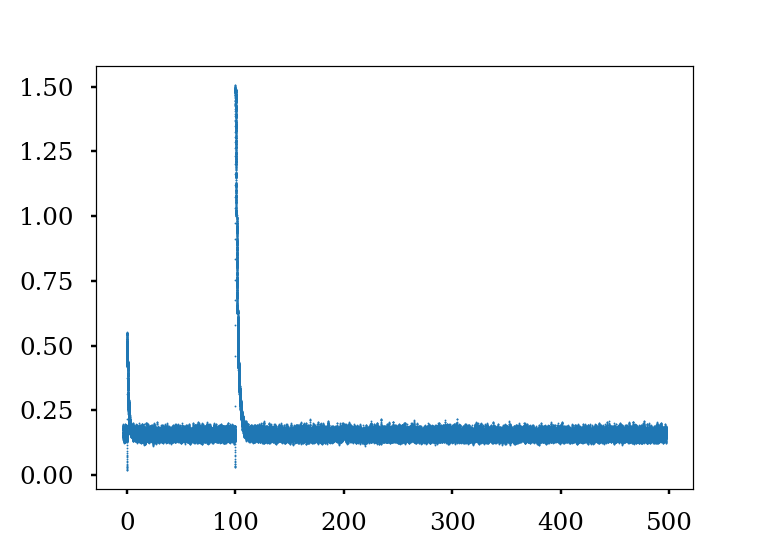

In [4]:
%matplotlib notebook

sample, ttype = 4, "T1" 
DF, τ = process_set(sample,ttype)

index = 0
plt.figure(figsize=(7,5))
plt.scatter(DF[index].time, DF[index].chanel_A, s=0.5);

In [5]:
# Commented when processing data
# Used to visualize the processed data
"""plot_max_of_set(7,"KE")
plt.grid()"""

'plot_max_of_set(7,"KE")\nplt.grid()'

In [6]:
for t in τ:
    print(t)
len(τ)

0.1
0.15
0.25
0.45
0.4
0.3
0.05
0.35
0.5
0.2


10